# Senior Data Scientist - Chimnie

Things to note:
 * developed on [Google Colab](https://colab.research.google.com/)
    * with 'high-RAM' enabled
    * 'Hardware accelerator' set to CPU
    * it's possible to load complete price paid data with pandas
    * later data manipulation with pandas causes out of RAM crashes
 * not tested in Jupyter

Load standard modules:

In [1]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load price paid data subset:

In [2]:
pp_may_24_url = 'http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-monthly-update-new-version.csv'
pp_23 = 'http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2023.csv'

pp_may_24 = pd.read_csv(pp_may_24_url, header=None)

pp_cols = ['id', 'price', 'date', 'postcode', 'type', 'new', 'duration',
           'paon', 'saon', 'street', 'locality', 'town', 'district', 'county',
           'ppd_category_type', 'record_status']
pp_may_24.columns = pp_cols

pp_may_24['date'] = pd.to_datetime(pp_may_24['date'])

# str_cols = ['paon', 'saon', 'street', 'locality', 'town', 'district', 'county']
# for str_col in str_cols:
#   pp_may_24[str_col] = pp_may_24[str_col].astype(str)

Summarise data subset:

In [3]:
def print_df_summary(df):
  print("Shape:")
  display(df.shape)

  total_nas = df.isna().sum().sum()
  rows_nas  = df.isnull().any(axis=1).sum()
  cols_nas  = df.isnull().any().sum()
  print('\nTotal NAs:', total_nas)
  print('Rows with NAs:', rows_nas)
  print('Cols with NAs:', cols_nas)

  print("\nInfo:")
  display(df.info())

  print("\nSummary stats:")
  display(df.describe())

  print("\nRaw data:")
  display(df)
  print("\n")


print_df_summary(pp_may_24)


for grp in ['type', 'new', 'duration', 'ppd_category_type', 'record_status']:
  print('\n')
  display(pp_may_24[[grp, 'price']].groupby(grp).describe())


print('\n\nNaNs:')
pp_may_24.isnull().sum()

Shape:


(78452, 16)


Total NAs: 115542
Rows with NAs: 76402
Cols with NAs: 4

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78452 entries, 0 to 78451
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 78452 non-null  object        
 1   price              78452 non-null  int64         
 2   date               78452 non-null  datetime64[ns]
 3   postcode           78176 non-null  object        
 4   type               78452 non-null  object        
 5   new                78452 non-null  object        
 6   duration           78452 non-null  object        
 7   paon               78452 non-null  object        
 8   saon               12521 non-null  object        
 9   street             77217 non-null  object        
 10  locality           30352 non-null  object        
 11  town               78452 non-null  object        
 12  district           78452 non-null  object        
 1

None


Summary stats:


,price,date
count,7.845200e+04,78452
mean,4.357407e+05,2023-06-04 22:15:07.112629248
min,1.000000e+02,1995-01-06 00:00:00
25%,1.760000e+05,2023-03-31 00:00:00
50%,2.750000e+05,2024-01-16 00:00:00
75%,4.180000e+05,2024-04-12 00:00:00
max,9.000000e+08,2024-05-31 00:00:00
std,4.601969e+06,NaN



Raw data:


,id,price,date,postcode,type,new,duration,paon,saon,street,locality,town,district,county,ppd_category_type,record_status
0,{1A0C5C63-265E-7CBE-E063-4804A8C06C96},249955,2021-06-24,CF72 9WU,D,N,F,36,NaN,BLACKTHORN COURT,LLANHARRY,PONTYCLUN,RHONDDA CYNON TAFF,RHONDDA CYNON TAFF,A,A
1,{1A0C5C63-26CF-7CBE-E063-4804A8C06C96},365000,2021-08-31,LL67 0LT,D,N,F,12,NaN,MAES CAPEL,NaN,CEMAES BAY,ISLE OF ANGLESEY,ISLE OF ANGLESEY,A,A
2,{1A0C5C63-270D-7CBE-E063-4804A8C06C96},202000,2021-09-30,SA4 6PW,T,N,F,31,NaN,HEOL CAE TYNEWYDD,LOUGHOR,SWANSEA,SWANSEA,SWANSEA,A,A
3,{1A0C5C63-2789-7CBE-E063-4804A8C06C96},300000,2021-06-30,SA11 3EU,D,N,F,14,NaN,DAVIES ANDREWS ROAD,TONNA,NEATH,NEATH PORT TALBOT,NEATH PORT TALBOT,A,A
4,{1A0C5C63-27A6-7CBE-E063-4804A8C06C96},115000,2021-08-11,NP10 8BL,T,N,F,12,NaN,SKYE GROVE,DUFFRYN,NEWPORT,NEWPORT,NEWPORT,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78447,{1061746E-A86B-3C34-E063-4804A8C0F9E7},55462,2024-01-19,SN13 0QU,T,N,L,52,NaN,STONE CLOSE,NaN,CORSHAM,WILTSHIRE,WILTSHIRE,A,D
78448,{1061746E-6EA8-3C34-E063-4804A8C0F9E7},295000,2024-01-02,BS23 4JL,F,N,L,25,FLAT 2,FRENCHAY ROAD,NaN,WESTON-SUPER-MARE,NORTH SOMERSET,NORTH SOMERSET,A,D
78449,{1061746E-6EDD-3C34-E063-4804A8C0F9E7},290000,2024-01-12,TA6 7BZ,D,N,F,8,NaN,STAG VALLEY ROAD,NaN,BRIDGWATER,SOMERSET,SOMERSET,A,D
78450,{1061746E-8AB6-3C34-E063-4804A8C0F9E7},81735,2024-01-19,DH4 4QL,T,N,F,3,NaN,WOODHALL SPA,SHINEY ROW,HOUGHTON LE SPRING,SUNDERLAND,TYNE AND WEAR,A,D


price                                                            \
        count          mean           std      min        25%       50%   
type                                                                      
D     17572.0  4.877258e+05  5.764996e+05   2000.0  300875.25  400000.0   
F     16214.0  3.243198e+05  5.104410e+05   2500.0  147500.00  235000.0   
O      5392.0  1.537092e+06  1.523031e+07    100.0  115000.00  298100.0   
S     20003.0  3.007591e+05  2.245559e+05  20000.0  186150.00  255000.0   
T     19271.0  3.140368e+05  4.512705e+06    750.0  138000.00  215000.0   

                             
           75%          max  
type                         
D     550250.0   49872000.0  
F     370000.0   18000000.0  
O     745393.0  900000000.0  
S     355000.0   10350000.0  
T     325000.0  620000000.0

price                                                          \
       count           mean           std    min       25%       50%   
new                                                                    
N    64656.0  448297.488570  5.065828e+06  100.0  165339.5  260000.0   
Y    13796.0  376892.101044  3.966385e+05  999.0  239950.0  326000.0   

                            
          75%          max  
new                         
N    410000.0  900000000.0  
Y    435000.0   16930000.0

price                                                          \
            count           mean           std    min       25%       50%   
duration                                                                    
F         57834.0  460113.849812  5.019737e+06  100.0  194995.0  294995.0   
L         20618.0  367373.239742  3.145992e+06  100.0  140000.0  224175.0   

                                 
               75%          max  
duration                         
F         435000.0  900000000.0  
L         352000.0  414108660.0

price                                                \
                     count           mean           std    min       25%   
ppd_category_type                                                          
A                  63001.0  365273.105506  2.508848e+06  750.0  190000.0   
B                  15451.0  723070.023105  9.042562e+06  100.0  119000.0   

                                                    
                        50%       75%          max  
ppd_category_type                                   
A                  285000.0  422500.0  620000000.0  
B                  215596.0  385000.0  900000000.0

price                                                \
                 count           mean           std    min       25%   
record_status                                                          
A              71383.0  427539.129583  4.484793e+06  100.0  179995.5   
C               2151.0  873225.216179  1.013442e+07  500.0  132997.5   
D               4918.0  363438.942660  9.514494e+05  500.0  170000.0   

                                                
                    50%       75%          max  
record_status                                   
A              275000.0  419995.0  900000000.0  
C              247000.0  433500.0  414108660.0  
D              265500.0  400000.0   52000000.0



NaNs:


id                       0
price                    0
date                     0
postcode               276
type                     0
new                      0
duration                 0
paon                     0
saon                 65931
street                1235
locality             48100
town                     0
district                 0
county                   0
ppd_category_type        0
record_status            0
dtype: int64

Download complete price paid data set from the Land Registry.

First, install [aria2c](https://aria2.github.io/) command line utility for multi-connection (faster) downloads.

In [4]:
pp_file = '/content/pp-complete.1.csv'

if not os.path.exists(pp_file):
  !apt-get install aria2
  !aria2c -x 16 -s 16 'http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-complete.csv' -o pp-complete.1.csv
else:
  print(f'{pp_file} already downloaded')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libaria2-0 libc-ares2
The following NEW packages will be installed:
  aria2 libaria2-0 libc-ares2
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 1,513 kB of archives.
After this operation, 5,441 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libc-ares2 amd64 1.18.1-1ubuntu0.22.04.3 [45.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libaria2-0 amd64 1.36.0-1 [1,086 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 aria2 amd64 1.36.0-1 [381 kB]
Fetched 1,513 kB in 2s (749 kB/s)
Selecting previously unselected package libc-ares2:amd64.
(Reading database ... 123589 files and directories currently installed.)
Preparing to unpack .../libc-ares2_1.18.1-1ubuntu0.22.04.3_amd64.deb ...
Unpacking libc-ares2:amd64 (1.18.1-1ubuntu

Install the python [datatable](https://datatable.readthedocs.io/) package.

Datatable is a python library for manipulating tabular data, which supports out-of-memory datasets and multi-threaded data processing.
Using datatable instead of pandas should avoid out of RAM problems on [Google Colab](https://colab.research.google.com/).

In [5]:
!pip install datatable

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 MB 9.6 MB/s eta 0:00:00


Load price paid data with datatable and rename columns.

In [6]:
import datatable as dt
from datatable import (dt, f, by, ifelse, update, sort, join,
                       count, min, max, mean, sum, rowsum)


DT = dt.fread(pp_file)
pp_cols = ['id', 'price', 'date_str', 'postcode', 'type', 'new', 'duration',
           'paon', 'saon', 'street', 'locality', 'town', 'district', 'county',
           'ppd_category_type', 'record_status']
DT.names = pp_cols

display(DT)
print('\n')
display(DT.stypes)

,id,price,date_str,postcode,type,new,duration,paon,saon,street,…,town,district,county,ppd_category_type,record_status
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪
0,{109BBF80-1E51-4910-8E2C-B124E1117A7A},34950,1995-06-09 00:00,BA3 3AH,F,N,L,COOMBEND HOUSE,7,COOMBEND,…,RADSTOCK,WANSDYKE,AVON,A,A
1,{D5233D67-2975-426B-B98D-B124E39331D9},133000,1995-06-19 00:00,SW18 5AG,T,N,F,142,,ASTONVILLE STREET,…,LONDON,WANDSWORTH,GREATER LONDON,A,A
2,{718BD35C-25E1-431C-8AF7-B124E63ED4E1},83000,1995-08-21 00:00,IP11 7PU,D,N,F,3,,GARFIELD ROAD,…,FELIXSTOWE,SUFFOLK COASTAL,SUFFOLK,A,A
3,{E127F626-6247-4D95-A392-B124F4C0A558},59000,1995-07-27 00:00,PE21 0SF,D,Y,F,BEAUCADRE,,GAYSFIELD ROAD,…,BOSTON,BOSTON,LINCOLNSHIRE,A,A
4,{B10762A0-2C9C-4C82-A885-B1250B55FFF9},51000,1995-02-28 00:00,ME7 4DF,T,N,F,41,,FRANKLIN ROAD,…,GILLINGHAM,GILLINGHAM,KENT,A,A
5,{BBAB55E8-216F-4FFA-B9EC-B4AD71F833EB},37000,1995-06-02 00:00,TN1 2ET,F,N,L,48,TOP FLOOR FLAT,UPPER GROSVENOR ROAD,…,TUNBRIDGE WELLS,TUNBRIDGE WELLS,KENT,A,A
6,{FD34F0B9-8697-481D-A231-B4AD7716F2F5},55000,1995-05-12 00:00,ST19 5AP,D,N,F,GAS HOUSE,,PINFOLD LANE,…,STAFFORD,SOUTH STAFFORDSHIRE,STAFFORDSHIRE,A,A
7,{657B1EA4-A147-4E1B-B70F-B4AD98A15237},47750,1995-12-12 00:00,LL18 5SZ,S,Y,F,18,,FFORDD TERFYN,…,RHYL,RHUDDLAN,CLWYD,A,A
8,{FF6684D0-67EF-4FE1-AC8F-B4AD99ACE2CD},53000,1995-05-25 00:00,BS30 5XW,S,N,F,4,,GRASMERE GARDENS,…,BRISTOL,KINGSWOOD,AVON,A,A


(stype.str32,
 stype.int32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32)

## 1.

Find two land registry records that are likely to be errors:

In [7]:
sel_cols = ['price', 'date_str', 'postcode', 'type', 'new', 'duration', 'paon',
            'saon', 'street', 'town', 'district', 'county']
DT[f.price > 600000000, sel_cols]

,price,date_str,postcode,type,new,duration,paon,saon,street,town,district,county
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪
0,900000000,2021-03-29 00:00,TN23 7HE,O,N,F,"PENROSE HOUSE, 46",APARTMENT 1,VICTORIA ROAD,ASHFORD,ASHFORD,KENT
1,620000000,2023-01-06 00:00,CV33 9FR,T,N,F,OAKLEY WOOD BARN,2,BANBURY ROAD,LEAMINGTON SPA,WARWICK,WARWICKSHIRE


The two most expensive properties recorded are unlikely to be an appartment or part of a barn conversion.  Assuming these aren't transcription errors, then they may be [copyright traps](https://en.wikipedia.org/wiki/Fictitious_entry#Copyright_traps) to detect plagiarism or copyright violations.

---

## 2.

Complete the following table by calculating the number of sales and average sale price for all London Boroughs in 2023.

In [18]:
# Add time64 'Date' column based on str32 'date_str' column
DT[:, dt.update(Date =
             dt.time.ymd(dt.as_type(dt.str.slice(f.date_str, 0, 4), int),
                         dt.as_type(dt.str.slice(f.date_str, 5, 7), int),
                         dt.as_type(dt.str.slice(f.date_str, 8, 10), int)))]
DT['year'] = DT[:, dt.time.year(f.Date)]

l23_cols = ['id', 'price', 'Date', 'year', 'district', 'county']
l23_mask = dt.re.match(f.county, 'GREATER LONDON') & (f.year == 2023)
london_23 = DT[l23_mask, l23_cols]

london_23_stats = london_23[:, {'count_sales': count(f.id),
                                'mean_price': mean(f.price)},
                            by('district')]
display(london_23_stats)
london_23_stats.to_csv('q2.csv')

,district,count_sales,mean_price
,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪
0,BARKING AND DAGENHAM,1355,397119
1,BARNET,3222,809265
2,BEXLEY,2543,432761
3,BRENT,1864,678122
4,BROMLEY,3741,603442
5,CAMDEN,1926,1.49899e+06
6,CITY OF LONDON,202,4.39989e+06
7,CITY OF WESTMINSTER,2648,2.36014e+06
8,CROYDON,3709,481384


See 'q2.csv' file for complete table.

---

## 3.

Count the number of new build Flats sold in each UK region since the start of 2020.

In [15]:
flats_since_2020 = DT[(f.year >= 2020) &
                      (f.type == 'F') &
                      (f.new == 'Y'), :]

flats_since_2020_stats = flats_since_2020[:, {'count_flats': count(f.id)},
                                          by('county')]
display(flats_since_2020_stats)
flats_since_2020_stats.to_csv('q3.csv')

,county,count_flats
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,BATH AND NORTH EAST SOMERSET,327
1,BEDFORD,291
2,BLACKBURN WITH DARWEN,5
3,BLACKPOOL,53
4,BLAENAU GWENT,2
5,"BOURNEMOUTH, CHRISTCHURCH AND POOLE",1025
6,BRACKNELL FOREST,751
7,BRIDGEND,55
8,BRIGHTON AND HOVE,257


See 'q3.csv' file for complete table.

---

## 4.

Plot the number of sales per week since the start of 2020 as a line chart.

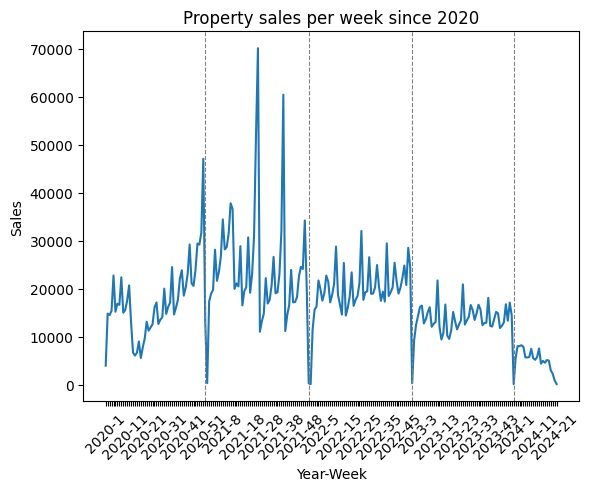

In [35]:
# Currently no datatable.time.week() method :-(
# https://datatable.readthedocs.io/en/latest/api/time.html
# Use datetime.isocalendar().week instead
weeks_list = [_date.isocalendar().week for _date in DT["Date"].to_list()[0]]
DT[:, "week"] = dt.Frame(weeks_list)

DT_2020 = DT[f.year >= 2020, :]
sales_per_week = DT_2020[:, {'count_sales': count(f.id)}, by('year', 'week')]
sales_per_week[:, update(year_week = f.year + '-' + f.week)]

# Avoid over-plotting labels
sparse_labels = []
sales_labels = sales_per_week['year_week'].to_list()[0]
for index, item in enumerate(sales_labels):
    if index % 10 == 0:
        sparse_labels.append(item)
    else:
        sparse_labels.append('')

# Plot sales data
plt.plot(sales_labels, sales_per_week['count_sales'])
plt.axvline(x='2020-52', color='grey', linestyle='--', linewidth=0.8)
plt.axvline(x='2021-52', color='grey', linestyle='--', linewidth=0.8)
plt.axvline(x='2022-52', color='grey', linestyle='--', linewidth=0.8)
plt.axvline(x='2023-52', color='grey', linestyle='--', linewidth=0.8)
plt.xticks(range(0, len(sparse_labels)), sparse_labels, rotation=45)
plt.xlabel('Year-Week')
plt.ylabel('Sales')
plt.title('Property sales per week since 2020')
plt.show()

There is a clear annual seasonality in this property sales data.  There are approximately 12 sales peaks per annual cycle (likely corresponding to monthly reporting).  Additioinally, there is a large sales decline at the end of each year.  The largest sales peaks and declines may correspond to covid 19 lockdowns and/or the so-called "race for space" rush from crowded cities to more spacious suburbs and countryside.  The reduction in sales during 2023, compared to 2022, may potentially reflect increased interest rates and/or reduced market confidence.

---

## 5.

Plot a histogram of sale prices and discuss which distribution best represents the data.

[Vaex](https://vaex.readthedocs.io/) is a python library for lazy Out-of-Core DataFrames, to visualize and explore big tabular datasets.  This package has a convenient [histogram plotting function](https://vaex.readthedocs.io/en/latest/api.html#vaex.viz.DataFrameAccessorViz.histogram).

First, install vaex:

In [36]:
!pip install vaex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 51.4 MB/s eta 0:00:0

Load the complete price paid data set with vaex and set the column names.

**NOTE**: The first row of data is lost.

In [37]:
import vaex


df = vaex.open(pp_file)

pp_cols = ['id', 'price', 'date', 'postcode', 'type', 'new', 'duration',
           'paon', 'saon', 'street', 'locality', 'town', 'county',
           'record_status']

old_names = df.get_column_names()
new_names = pp_cols
pp_names = dict(zip(old_names, new_names))

for old_name in pp_names:
  new_name = pp_names[old_name]
  df.rename(old_name, new_name)

display(df.info())

column,type,unit,description,expression
id,str,,,
price,int64,,,
date,datetime64[s],,,
postcode,str,,,
type,str,,,
new,str,,,
duration,str,,,
paon,str,,,
saon,str,,,
street,str,,,


None


Square root transformation is applied to sale price data for several reasons:

 * Normalization: It can help normalise right-skewed distributions.
 * Variance stabilization: It can stabilise variance across different price ranges.
 * Linearity: It can improve linear relationships between variables.
 * Outlier impact reduction: It reduces the impact of extreme high values.
 * Statistical assumptions: It helps meet assumptions for many statistical tests.
 * Interpretability: The transformed data retains a more intuitive relationship to the original values compared to log transformations.

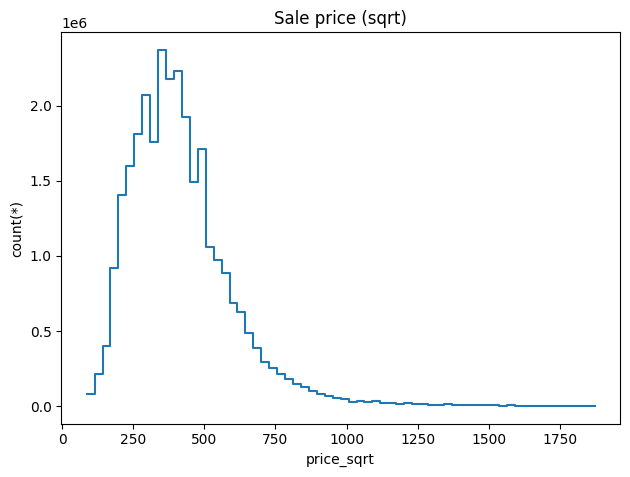

In [39]:
df['price_float'] = df.price.astype('float64')
df['price_sqrt'] = df.price_float ** 0.5

df.viz.histogram(df.price_sqrt, limits='99.7%')
plt.title('Sale price (sqrt)')
plt.show()



**TODO** Discuss which distribution best represents the data

---

## 6.

Using the BNG tiles and an appropriate scale, plot a map showing the number of sales per 10km grid square.

First download the [NSPL postcode data](https://geoportal.statistics.gov.uk/datasets/f7464f3658ba439ba577651b32014cfe/about) and extract postcode, Ordinance Survey (OS) eastings and northings plus latitude and longitude:

In [40]:

# DEBUG - Delete me
# !rm -f NSPL_2021_MAY_2024.zip
# !rm -rf Data Documents User\ Guide

!wget 'https://www.arcgis.com/sharing/rest/content/items/f7464f3658ba439ba577651b32014cfe/data' -O 'NSPL_2021_MAY_2024.zip'
!unzip NSPL_2021_MAY_2024.zip
!awk -F',' '{print $3","$7","$8","$29","$30}' Data/NSPL21_MAY_2024_UK.csv | tr -d '"' > pcd_os_lat_long.csv
!ls -l pcd_os_lat_long.csv

--2024-07-23 15:00:51--  https://www.arcgis.com/sharing/rest/content/items/f7464f3658ba439ba577651b32014cfe/data
Resolving www.arcgis.com (www.arcgis.com)... 18.234.22.44, 34.233.149.104, 18.234.22.250
Connecting to www.arcgis.com (www.arcgis.com)|18.234.22.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ago-item-storage.s3.amazonaws.com/f7464f3658ba439ba577651b32014cfe/NSPL_2021_MAY_2024.zip?X-Amz-Security-Token=IQoJb3JpZ2luX2VjELb%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEaCXVzLWVhc3QtMSJHMEUCIGq61N8cWX9fwkNnNDi2trGUou8j%2B%2Boj3yE5E9SbBnFqAiEA9w%2FaDJErBetwBO6LxHDcdsiifRySqTc04GV38fq8aiIqvAUIj%2F%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FARAAGgw2MDQ3NTgxMDI2NjUiDMpizJrgWbsCqTjnxiqQBXZ%2BLOTdFSEH%2B77ee4IyQUtwYn6Vb7VLn7JETZzvog9RHTAZg%2BJqFARP53C49aabOY9%2FnWx1feflBmyJgDl%2FYZI5WXs0puuJ8tsQM%2BEL1I8oCCnVikEuRYT%2FxlHWH1rkyegPONCW0JbDA0tKGSkXAqaEIY3K1NCZkJdlr9d0ZCJynnVCSnARa9bOdt5A7a6ztu%2FeB6XSbEg100cVW%2FO4cKExsN8RXHjHZEy9tmOOMavD91v6qfJ8qQ8edJu0uGiOCR2Kvr72x4hoyyU

Load postcode, OS eastings, OS northings, latitude, longitude data and join to price paid table.  Then check missing values.

In [41]:
pcd = dt.fread('pcd_os_lat_long.csv')
pcd.names = ['postcode', 'oseast1m', 'osnrth1m', 'lat', 'long']
pcd.key = "postcode"

display(pcd)
print('\n')
display(pcd.stypes)

DT_ll = DT[:, :, join(pcd)]
print('\n')
display(DT_ll)

print('\nmissing:')
display(DT_ll['oseast1m'].to_pandas().isna().sum())
display(DT_ll['osnrth1m'].to_pandas().isna().sum())
display(DT_ll['lat'].to_pandas().isna().sum())
display(DT_ll['long'].to_pandas().isna().sum())

postcode,oseast1m,osnrth1m,lat,long
▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪
AB1 0AA,385386,801193,57.1015,−2.24285
AB1 0AB,385177,801314,57.1026,−2.24631
AB1 0AD,385053,801092,57.1006,−2.24834
AB1 0AE,384600,799300,57.0844,−2.25571
AB1 0AF,384460,800660,57.0967,−2.2581
AB1 0AG,383890,800710,57.0971,−2.26751
AB1 0AJ,384779,800921,57.099,−2.25285
AB1 0AL,384669,801228,57.1018,−2.25469
AB1 0AN,385225,800757,57.0976,−2.24548


(stype.str32, stype.int32, stype.int32, stype.float64, stype.float64)

,id,price,date_str,postcode,type,new,duration,paon,saon,street,…,week,oseast1m,osnrth1m,lat,long
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪
0,{109BBF80-1E51-4910-8E2C-B124E1117A7A},34950,1995-06-09 00:00,BA3 3AH,F,N,L,COOMBEND HOUSE,7,COOMBEND,…,23,368805,155097,51.2941,−2.44877
1,{D5233D67-2975-426B-B98D-B124E39331D9},133000,1995-06-19 00:00,SW18 5AG,T,N,F,142,,ASTONVILLE STREET,…,25,525309,172893,51.4412,−0.198423
2,{718BD35C-25E1-431C-8AF7-B124E63ED4E1},83000,1995-08-21 00:00,IP11 7PU,D,N,F,3,,GARFIELD ROAD,…,34,629789,234357,51.9602,1.34321
3,{E127F626-6247-4D95-A392-B124F4C0A558},59000,1995-07-27 00:00,PE21 0SF,D,Y,F,BEAUCADRE,,GAYSFIELD ROAD,…,30,536325,342200,52.9599,0.028082
4,{B10762A0-2C9C-4C82-A885-B1250B55FFF9},51000,1995-02-28 00:00,ME7 4DF,T,N,F,41,,FRANKLIN ROAD,…,9,577715,168262,51.3856,0.552598
5,{BBAB55E8-216F-4FFA-B9EC-B4AD71F833EB},37000,1995-06-02 00:00,TN1 2ET,F,N,L,48,TOP FLOOR FLAT,UPPER GROSVENOR ROAD,…,22,558611,140091,51.1381,0.265812
6,{FD34F0B9-8697-481D-A231-B4AD7716F2F5},55000,1995-05-12 00:00,ST19 5AP,D,N,F,GAS HOUSE,,PINFOLD LANE,…,19,392104,314238,52.7257,−2.11835
7,{657B1EA4-A147-4E1B-B70F-B4AD98A15237},47750,1995-12-12 00:00,LL18 5SZ,S,Y,F,18,,FFORDD TERFYN,…,50,298395,376168,53.2727,−3.52508
8,{FF6684D0-67EF-4FE1-AC8F-B4AD99ACE2CD},53000,1995-05-25 00:00,BS30 5XW,S,N,F,4,,GRASMERE GARDENS,…,21,367601,172844,51.4536,−2.46766



missing:


oseast1m    49184
dtype: int64

osnrth1m    49184
dtype: int64

lat    49184
dtype: int64

long    49184
dtype: int64

The 49,184 missing values are likely from the channel islands and/or the Isle of Man.  Also note, Northern Ireland is not included because apparently they use the Irish National Grid system.

---

Download [Ordance Survey National Grids](https://github.com/charlesroper/OSGB_Grids) in 10 Km squares.

In [42]:
!wget 'https://github.com/charlesroper/OSGB_Grids/blob/master/Shapefile/OSGB_Grid_10km.shp?raw=true' -O 'OSGB_Grid_10km.shp'
!ls -l OSGB_Grid_10km.shp

!wget 'https://github.com/charlesroper/OSGB_Grids/blob/master/Shapefile/OSGB_Grid_10km.shx?raw=true' -O 'OSGB_Grid_10km.shx'
!ls -l OSGB_Grid_10km.shx

--2024-07-23 15:02:10--  https://github.com/charlesroper/OSGB_Grids/blob/master/Shapefile/OSGB_Grid_10km.shp?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/charlesroper/OSGB_Grids/raw/master/Shapefile/OSGB_Grid_10km.shp [following]
--2024-07-23 15:02:10--  https://github.com/charlesroper/OSGB_Grids/raw/master/Shapefile/OSGB_Grid_10km.shp
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/charlesroper/OSGB_Grids/master/Shapefile/OSGB_Grid_10km.shp [following]
--2024-07-23 15:02:10--  https://raw.githubusercontent.com/charlesroper/OSGB_Grids/master/Shapefile/OSGB_Grid_10km.shp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (ra

First, load British National Grid (BNG) 10 Km grid squares with [GeoPandas](https://geopandas.org/en/stable/).

Second, make a [GeoDataFrame](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html) from the price paid data including OS eastings and northings.

Third, perform spatial join between `sales_data` (points) and `bng_tiles`(polygons) and count number of sales in each grid square.

Finally, plot the sales map.

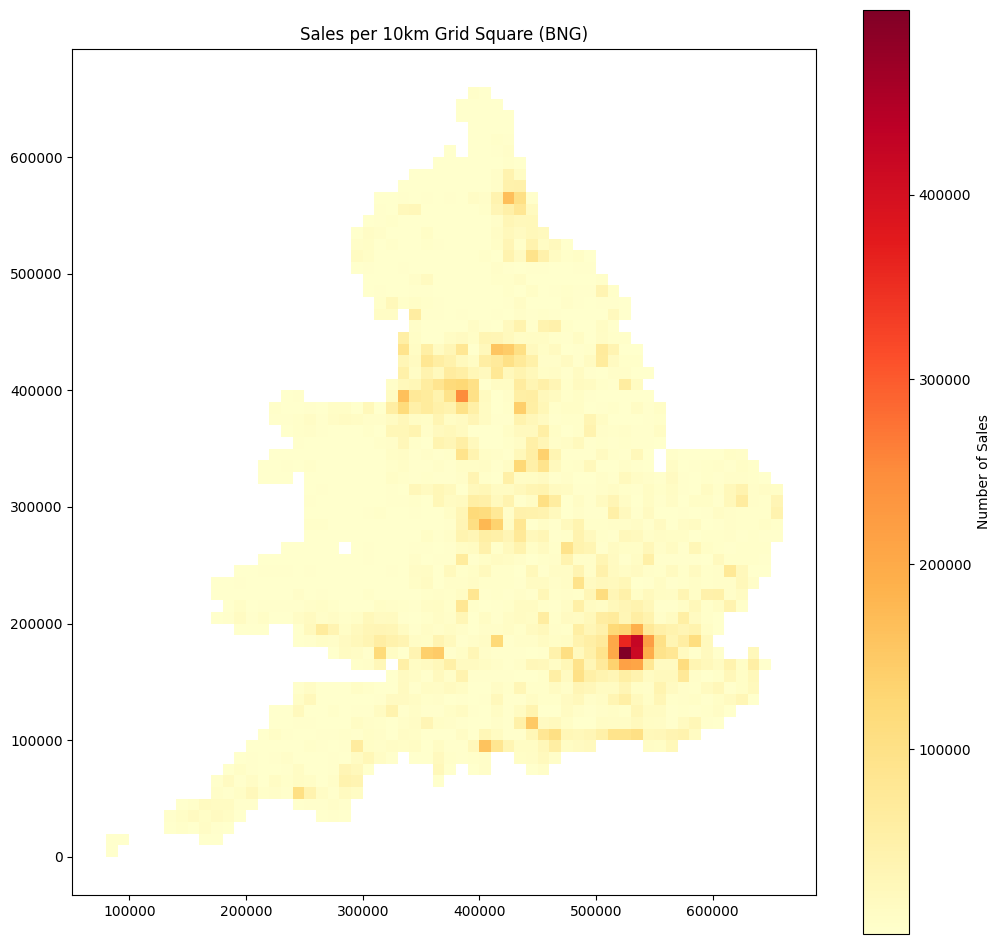

In [92]:
import geopandas as gpd


# Projected coordinate system for United Kingdom
crs = 'EPSG:27700'

# Step 1: Load BNG tiles
bng_tiles = gpd.read_file('OSGB_Grid_10km.shp', crs=crs)
bng_tiles.set_crs(crs, inplace=True)
# display(bng_tiles)
# display(bng_tiles.crs)
# bng_tiles.plot()
# plt.show()

# Step 2: Create a GeoDataFrame from the price paid data including
#         OS eastings and northings
# Assuming 'sales' data is a DataFrame with 'BNG' column representing
# point locations and a 'sales' column representing sales figures
sales_data = gpd.GeoDataFrame({'geometry': gpd.points_from_xy(DT_ll['oseast1m'].to_list()[0],
                                                              DT_ll['osnrth1m'].to_list()[0]),
                               'sales': DT_ll['price'].to_list()[0]},
                               crs = crs)
# display(sales_data)
# sales_data.plot()
# plt.show()


# Step 3: Perform spatial join between sales_data (points) and bng_tiles (polys)
#         and count number of sales
# WARNING: Bottleneck here
sales_grid = bng_tiles.join(
    gpd.sjoin(sales_data, bng_tiles).groupby("index_right").size().rename("sales_count"),
    how="left",
)
# print('sales_grid:')
# display(sales_grid)

# Step 4: Plot the map
fig, ax = plt.subplots(figsize=(12, 12))
sales_grid.plot(column='sales_count', cmap='YlOrRd', linewidth=0.8,
                 ax=ax, legend=True,  # edgecolor='0.8',
                 legend_kwds={'label': 'Number of Sales'}
                 )
plt.title('Sales per 10km Grid Square (BNG)')
plt.show()

,geometry,points
0,"POLYGON ((439999.999 1200000.003, 439999.999 1...",NaN
1,"POLYGON ((449999.996 1200000.003, 449999.996 1...",NaN
2,"POLYGON ((449999.996 1210000.000, 449999.996 1...",NaN
3,"POLYGON ((460000.002 1200000.003, 460000.002 1...",NaN
4,"POLYGON ((460000.002 1210000.000, 460000.002 1...",NaN
...,...,...
2878,"POLYGON ((640000.001 169999.997, 640000.001 18...",NaN
2879,"POLYGON ((540000.000 89999.997, 540000.000 100...",44.0
2880,"POLYGON ((549999.997 89999.997, 549999.997 100...",37.0
2881,"POLYGON ((560000.003 89999.997, 560000.003 100...",78.0


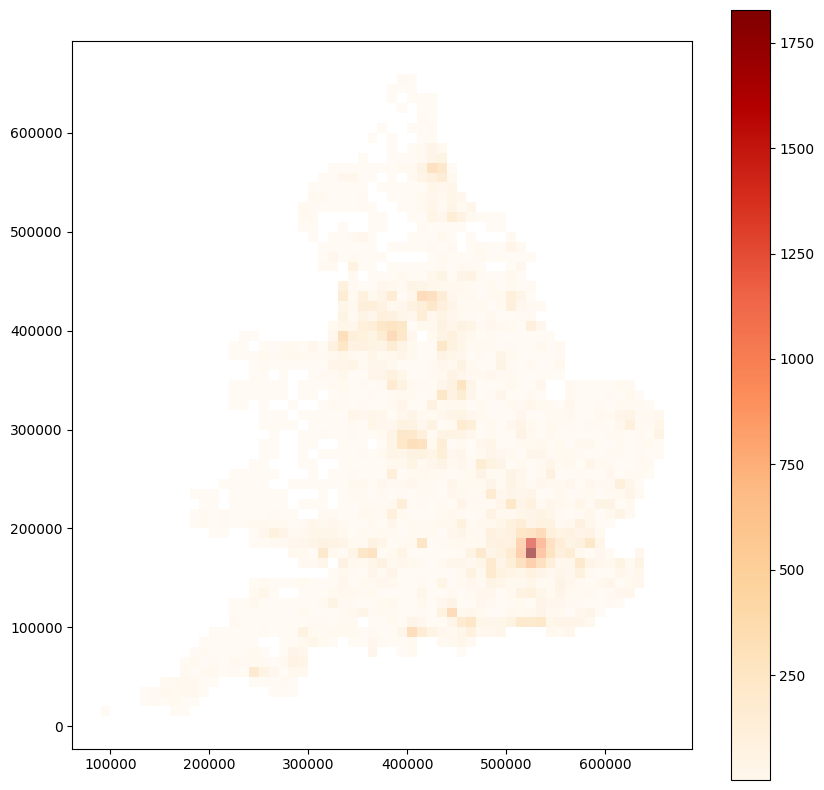

In [87]:
# grid = gpd.sjoin(bng_tiles, sales_data, how="left", predicate="contains")
# grid = gpd.sjoin(bng_tiles, sales_data, how="inner", predicate="contains")#.groupby("index_right").size()
# grid = gpd.sjoin(bng_tiles, sales_data)

#df_poly.join(
#    gpd.sjoin(dfp, df_poly).groupby("index_right").size().rename("points"),
#    how="left",
#)

grid = bng_tiles.join(
    gpd.sjoin(sales_data, bng_tiles).groupby("index_right").size().rename("points"),
    how="left",
)

display(grid)

# Project the grid back to BNG for plotting (if necessary)
# grid = grid.to_crs(bng_tiles.crs)

fig, ax = plt.subplots(figsize=(10, 10))
# grid.boundary.plot(ax=ax, linewidth=0.5, edgecolor='black')
grid.plot(column='points', ax=ax, legend=True, cmap='OrRd', alpha=0.6)
plt.show()

sales_count:


,geometry,index_right,sales
0,"POLYGON ((439999.999 1200000.003, 439999.999 1...",NaN,NaN
1,"POLYGON ((449999.996 1200000.003, 449999.996 1...",NaN,NaN
2,"POLYGON ((449999.996 1210000.000, 449999.996 1...",NaN,NaN
3,"POLYGON ((460000.002 1200000.003, 460000.002 1...",NaN,NaN
4,"POLYGON ((460000.002 1210000.000, 460000.002 1...",NaN,NaN
...,...,...,...
2881,"POLYGON ((560000.003 89999.997, 560000.003 100...",6728.0,36000.0
2881,"POLYGON ((560000.003 89999.997, 560000.003 100...",67291.0,44000.0
2881,"POLYGON ((560000.003 89999.997, 560000.003 100...",80227.0,8000.0
2881,"POLYGON ((560000.003 89999.997, 560000.003 100...",35806.0,118000.0


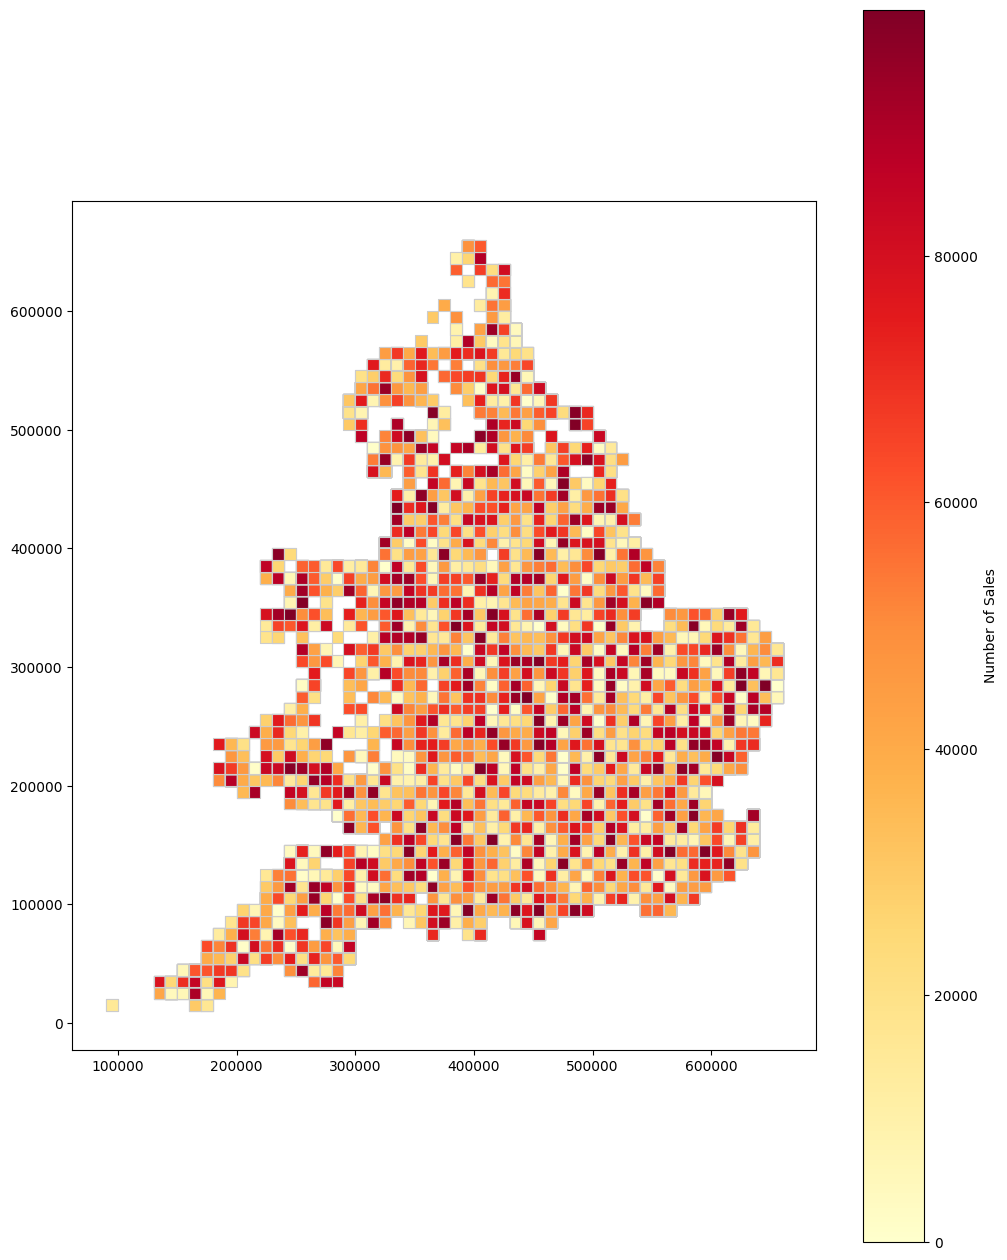

In [ ]:
# ROUGH WORK - Delete me!
# WARNING: Danger ...
# joined = gpd.sjoin(sales_data, grid, how='left', op='within')
# joined = gpd.sjoin(sales_data, grid, how='left', predicate='within')
# joined = gpd.sjoin(sales_data, grid, how='left', predicate='contains')
# joined

# Join sales data to the grid based on spatial intersection
# grid = grid.merge(sales_data.dissolve(by='geometry'), on='geometry', how='left')
# grid = grid.merge(sales_data.dissolve(), on='geometry', how='left')
#grid = grid.merge(sales_data, on='geometry', how='left')
#grid['sales_count'] = grid['sales'].count()
#grid['sales_count'].fillna(0, inplace=True)
#grid

# Perform spatial join
# joined = gpd.sjoin(sales_data, bng_tiles, how='left', op='within')
joined = gpd.sjoin(sales_data, bng_tiles, how='right', predicate='contains')
# sales_count = gpd.sjoin(bng_tiles, sales_data, how="left", predicate="contains").groupby("index_left").size()
# sales_count = gpd.sjoin(bng_tiles.to_crs(), sales_data, how="left", predicate="contains") # .groupby("index_left").size()


# sales_count = gpd.sjoin(bng_tiles, sales_data, how="right", predicate="within")#.groupby("index_left").size()
sales_count = gpd.sjoin(bng_tiles, sales_data, how="left", predicate="contains")#.groupby("index_right").size()
print('sales_count:')
display(sales_count)

# Step 5: Plot the map
fig, ax = plt.subplots(figsize=(12, 16))
sales_count.plot(column='index_right', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8',
          ax=ax, legend=True, legend_kwds={'label': 'Number of Sales'})
plt.show()


# Calculate the sum of sales within each grid square
joined['sales_count'] = joined['sales'].count()
joined['sales_count'].fillna(0, inplace=True)

# Project the grid back to BNG for plotting (if necessary)
joined = joined.to_crs(crs)

# Plot the grid with colors representing sales count per square
joined.plot(column='sales_count', cmap='YlOrRd')  # slow :-(
bng_tiles.plot(alpha=0.4, facecolor='lightgray')
plt.title('Sales per 10km Grid Square (BNG)')
plt.show()

In [ ]:
import gc


gc.collect()
gc.collect()

0

## 7.

Plot a map showing the average sale price per 10km grid square.

...